In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
# Read csv
df = pd.read_csv('../Datas/diamonds.csv')
df.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [5]:
# Describe our data for each feature and use .info() for get information about our dataset
df.info()
# Analyse missing values
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Exploratory Data Analysis

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


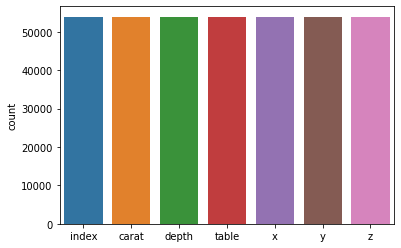

In [6]:
# label Distribution
sns.countplot(data=df)
df.head()

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

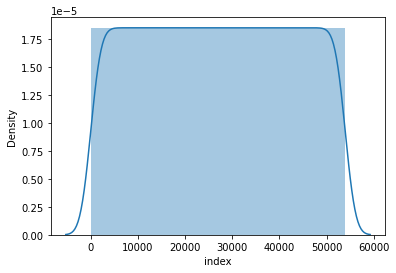

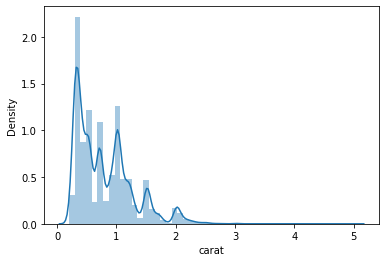

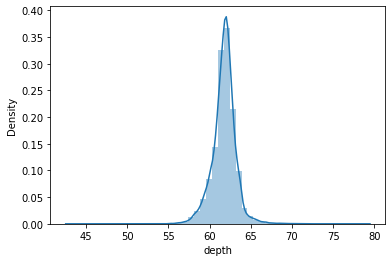

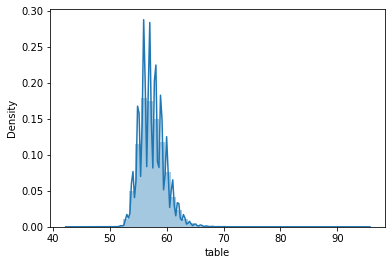

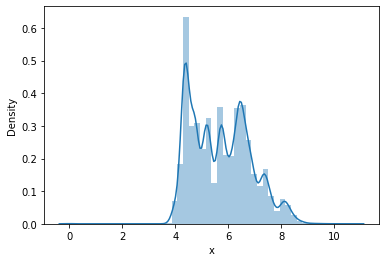

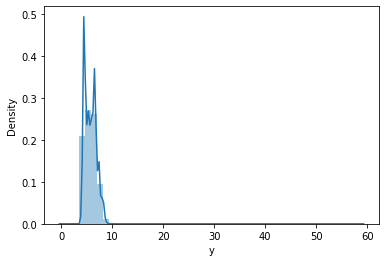

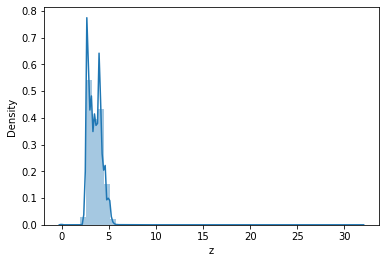

In [7]:
# Example EDA 
cols = ['index','carat','depth','table','x','y','z']
for col in cols:
  plt.figure() 
  sns.distplot(df[col])

# Preprocessing

In [8]:
# check duplicates
df[df.duplicated()]

,index,carat,cut,color,clarity,depth,table,x,y,z,price


In [9]:
#Encoding the labels
label_encoder = LabelEncoder()
features = ['cut','color','clarity','price']
for feature in features:
    df[feature] = label_encoder.fit_transform(df[feature])
# Dropping unnecessary column
df.drop(["index"], axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,4
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,4
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,4
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,4
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,4


In [10]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['price'], axis = 1) # independent variable
y = df[['price']] #dependent variable

In [11]:
#Scaling the data (Normalization)
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X)
X_n = norm.transform(X)

In [12]:
df["price"].value_counts()

4    34663
1    11271
2     4109
0     2308
3     1589
Name: price, dtype: int64

In [13]:
#Split into train, test set
X_train, X_test, y_train,y_test = train_test_split(X_n, y, test_size = 0.30, random_state = 102)
X_train.shape

(37758, 9)

# ML Application

In [14]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.8662270247364797
Accuracy of test: 0.8657767890248425


In [15]:
# Metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.6793747684187752
Recall = 0.6796938161366894
Accuracy = 0.8657767890248425
F1 Score = 0.6773926090762875


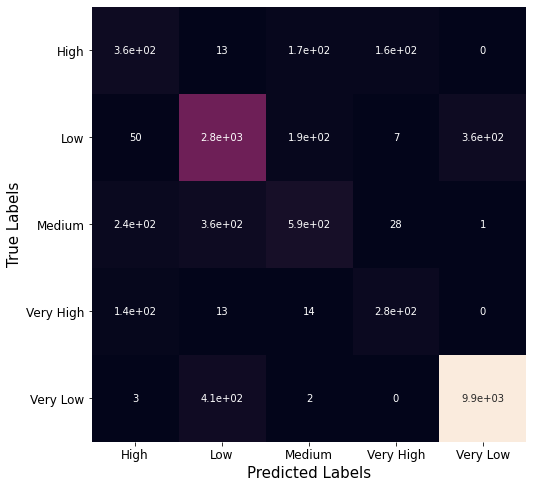

In [21]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
categories = list(label_encoder.inverse_transform([0, 1, 2, 3, 4]))
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [22]:
import xgboost as xgb
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob',
         'num_class':5}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

preds = model.predict(dmatrix_test)

[17:58:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [23]:
preds = model.predict(dmatrix_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 4, 4, ..., 2, 4, 4], dtype=int64)

In [24]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.7453013709540532
Recall = 0.7461751049605004
Accuracy = 0.8920405388703497


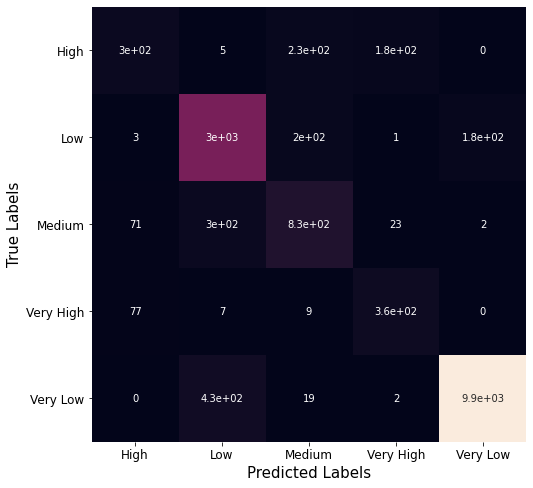

In [25]:
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()